# Observed Trends
    1) CBS has by far the most positive 'compound sentiment' over the last 100 tweets according to Vader sentiment analysis.
    2) BBC and NY Times are the only two out of the five observed news outlets that have negative 'compound sentiment' values over the last 100 tweets. BBC is the most negative overall -- perhaps because they have the most reporting on world news out of these observed news outlets.
    3) Fox News has the aggregate compound score closest to zero, implying that their tweets are the most neutral overall in this dataset.

In [1]:
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = "RZtUlr4WgwHqb25tlJzQFlgwH"
consumer_secret = "WyHARdwkWASvQyyxWZlLU6fRmCWnUuBqQn9Ngkg8TgikAQvB9u"
access_token = "942946269793624065-0ODdw1IsP0ZzDr3hMYi1NaUjJNGIQIt"
access_token_secret = "TRsMADWtzgd3QAbyzYmmJBCiQcRmIVzMdxTVBQuj2Zh9h"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

target_users = ['@BBCWorld', '@CBS', '@CNN', '@FoxNews', '@nytimes']
all_user_list = []
all_timestamp_list = []
all_compound_list = []
all_pos_list = []
all_neu_list = []
all_neg_list = []
all_text_list = []
all_sentiment_list = []
all_tweets_ago_list = []

for target_user in target_users:
    user_list = []
    timestamp_list = []
    compound_list = []
    pos_list = []
    neu_list = []
    neg_list = []
    text_list = []
    tweets_ago_list = []
    tweet_count = 0
    
    for x in range(5):
        public_tweets = api.user_timeline(target_user, page=x)

        for tweet in public_tweets:
            timestamp = tweet["created_at"]
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            user_list.append(tweet["user"]["screen_name"])
            timestamp_list.append(timestamp)
            compound_list.append(compound)
            pos_list.append(pos)
            neu_list.append(neu)
            neg_list.append(neg)
            text_list.append(tweet["text"])
            tweet_count += 1
            tweets_ago_list.append(tweet_count)
            #print(tweet['user']['screen_name'])
            #print(json.dumps(tweet, sort_keys=True, indent=4, separators=(',', ': ')))
            
    all_user_list.append(user_list)
    all_timestamp_list.append(timestamp_list)
    all_compound_list.append(compound_list)
    all_pos_list.append(pos_list)
    all_neu_list.append(neu_list)
    all_neg_list.append(neg_list)
    all_text_list.append(text_list)
    all_tweets_ago_list.append(tweets_ago_list)
            
        # Print the Averages
            #print("")
            #print("User: %s" % target_term)
            #print(timestamp)
            #print(f"Compound: {np.mean(compound_list)}")
            
    #sentiment = {
    #    "%s Compound" % target_user : np.mean(compound_list)
    #}
    sentiments = np.mean(compound_list)
    all_sentiment_list.append(sentiments)
    #print (sentiment)

In [2]:
all_user_list = np.array(all_user_list).flatten().tolist()
all_timestamp_list = np.array(all_timestamp_list).flatten().tolist()
all_compound_list = np.array(all_compound_list).flatten().tolist()
all_pos_list = np.array(all_pos_list).flatten().tolist()
all_neu_list = np.array(all_neu_list).flatten().tolist()
all_neg_list = np.array(all_neg_list).flatten().tolist()
all_text_list = np.array(all_text_list).flatten().tolist()
all_tweets_ago_list = np.array(all_tweets_ago_list).flatten().tolist()

In [3]:
sentiment = {'User': all_user_list, 'Timestamp': all_timestamp_list, 'Compound_Score': all_compound_list, 'Pos_Score': all_pos_list, 'Neu_Score': all_neu_list, 'Neg_Score': all_neg_list, 'Tweets_Ago': all_tweets_ago_list, 'Tweet_Text': all_text_list}
sentiment_df = pd.DataFrame(sentiment)
sentiment_df.to_csv("Twitter_News_Outlet_Sentiment.csv", index=False, header=True)
sentiment_df

,Compound_Score,Neg_Score,Neu_Score,Pos_Score,Timestamp,Tweet_Text,Tweets_Ago,User
0,-0.5574,0.118,0.882,0.000,Mon Jan 08 22:31:10 +0000 2018,RT @BBCSport: Widnes Vikings' Kato Ottio has d...,1,BBCWorld
1,0.0000,0.000,1.000,0.000,Mon Jan 08 22:21:04 +0000 2018,North and South Korea to begin high-level talk...,2,BBCWorld
2,0.0000,0.000,1.000,0.000,Mon Jan 08 22:07:47 +0000 2018,Google sued over 'male discrimination' https:/...,3,BBCWorld
3,0.0000,0.000,1.000,0.000,Mon Jan 08 21:22:53 +0000 2018,Rugby League player Ottio dies aged 23 https:/...,4,BBCWorld
4,-0.3923,0.164,0.744,0.092,Mon Jan 08 21:20:13 +0000 2018,RT @BBCNorthAmerica: - Sad!\n- Bigly? Or big l...,5,BBCWorld
5,-0.7717,0.242,0.758,0.000,Mon Jan 08 21:09:40 +0000 2018,RT @BBCSport: Widnes Vikings centre Kato Ottio...,6,BBCWorld
6,-0.5719,0.485,0.515,0.000,Mon Jan 08 19:26:48 +0000 2018,'Raw water': A dangerous new health craze? htt...,7,BBCWorld
7,0.0000,0.000,1.000,0.000,Mon Jan 08 18:44:08 +0000 2018,Ghana bars recruits over stretch marks and ble...,8,BBCWorld
8,-0.8176,0.586,0.414,0.000,Mon Jan 08 18:36:15 +0000 2018,Egypt police detained after custody death trig...,9,BBCWorld
9,-0.5574,0.340,0.660,0.000,Mon Jan 08 18:23:20 +0000 2018,Bangladesh court upholds Myanmar Rohingya marr...,10,BBCWorld


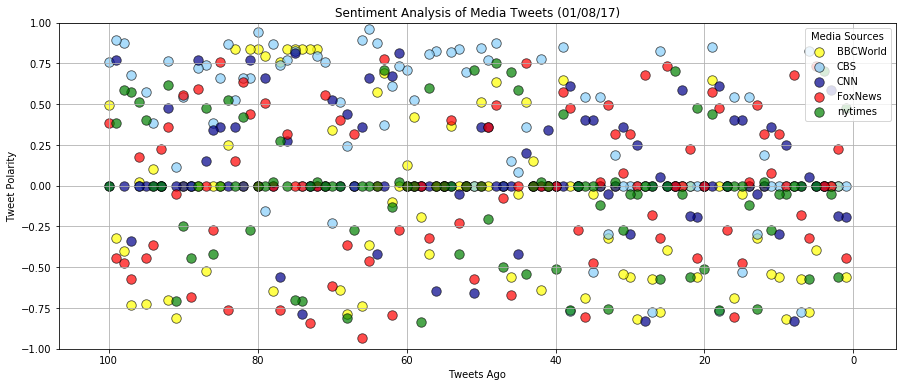

In [4]:
users = sentiment_df['User'].unique()
colors = ['yellow', 'lightskyblue', 'darkblue', 'red', 'green']

for i in range(len(users)):
    plt.scatter(x=sentiment_df[sentiment_df['User']==users[i]]['Tweets_Ago'].values,
                y=sentiment_df[sentiment_df['User']==users[i]]['Compound_Score'].values,
                s = 90,#*sentiment_df[sentiment_df['User']==users[i]]['Tweets_Ago'].values,
                c = colors[i], label = users[i],
                alpha = .7, edgecolor = 'black', linewidth = .8)

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (01/08/17)")
plt.legend(title="Media Sources", loc='upper right')
plt.grid()
plt.gcf().set_size_inches(15, 6)
plt.rcParams['axes.facecolor'] = 'gainsboro'
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
plt.ylim(-1, 1)
plt.savefig("Sentiment_Analysis_Tweets.png")
plt.show()

In [5]:
avg_sentiment = {'User': target_users, 'Avg_Compound_Score': all_sentiment_list}
avg_sentiment_df = pd.DataFrame(avg_sentiment)
avg_sentiment_df

,Avg_Compound_Score,User
0,-0.051442,@BBCWorld
1,0.316011,@CBS
2,0.088324,@CNN
3,0.010650,@FoxNews
4,-0.024022,@nytimes


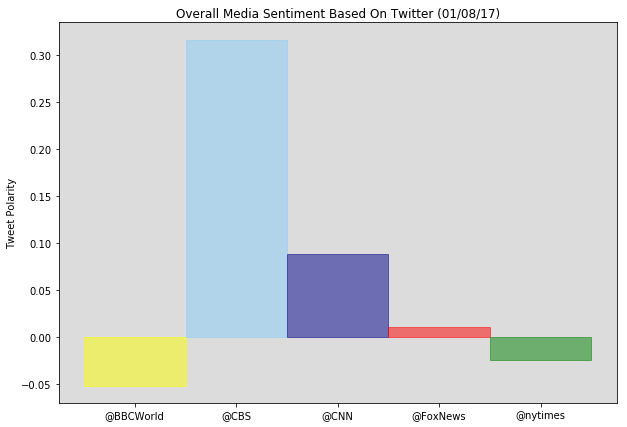

In [6]:
x_values = np.arange(len(avg_sentiment_df))
plt.figure(figsize=(10, 7))
barlist=plt.bar(x_values, avg_sentiment_df["Avg_Compound_Score"], alpha=0.5, align='center', width=1)
plt.xticks(x_values, avg_sentiment_df["User"], rotation="horizontal")
for i in range(len(barlist)):
    barlist[i].set_color(colors[i])
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based On Twitter (01/08/17)")
plt.savefig("Overall_Media_Sentiment.png")
plt.show()